In [5]:
from itertools import count
import pandas as pd
from random import randint
from argparse import ArgumentParser
import matplotlib.pyplot as plt
import re

class Game:
    """This is the class that holds the functions that run our final project, a word game. This game 
    reads a text file with words on it and a text file with the clues for guessing each word on it.
    The program will then have the player pick if they want too play against the computer and the 
    computers difficulty. The player will then try too guess the word using the clue(s). The player
    and computer are awarded points based on the amount of guesses they used.
    Attributes:
        player_name (str): name of the player
        user_words_guessed (list of str): A list of the words the user has guessed
        easy_path (str): filepath for easy words
        hard_path (str): filepath for hard words
        easy_df (Dataframe): dataframe of easy words
        hard_df (Dataframe): dataframe of hard words
        df (Dataframe): dataframe that will be used (either easy_df or hard_df)
        word (str): The word the user and computer will have to guess
        clue (str): The clue associated with the word being guessed
        count (int): Keeps track of who's turn it is
    """
    
    def __init__(self, player_name, easy_path, hard_path):
        """This will set up the game and initiate the game attributes
        Args:
            player_name (str): The name of the player
            easy_path (str): The filepath for the easy words
            hard_path (str): The filepath for the hard words
        Side effects:
            Sets all the attributes and initilizes the game
        """
        self.player_name = player_name
        self.user_words_guessed = list()
        self.easy_path = easy_path
        self.hard_path = hard_path
        self.easy_df, self.hard_df = self.open_files(self.easy_path, self.hard_path)
        self.df = self.pick_difficulty()
        self.word, self.clue = self.generate_word()
        self.count = 0
        self.computer_name = input("Enter a name for the computer player or leave blank for computer")
        if self.computer_name == "":
            self.play_game()
        else:
            self.play_game(self.computer_name)
        
    def open_files(self, easy_path, hard_path):
        """This will open two files. Each file is a csv file with of each word 
            and clue.
            easy_path (str): Filename of the easy clues file
            hard_path (str): Filename of the hard clues file
        Returns:
            tuple of Dataframes: Easy dataframe and hard dataframe
        """
        
        return pd.read_csv(easy_path), pd.read_csv(hard_path)
    
    def check_turn(self):
        if self.count%2 == 0:
             return 1
        else:
             return 2
         
    def user_guesses(self):
        
        """This function will take the letters or word guessed by the player and it will return a match stored in the file.

        Args:
            player (str): The player will identify who they are
            guess_length (str):The length of the word guessed by the player
        Returns:
             str: Will return the guesses made by the player (letters or a word)
        """
        guess = input("Enter a word to solve: ")
    
        while re.search(r"[A-Za-z]\b", guess) == None:
            guess = input("Invalid guess. Please enter a word.: ")
        return guess
            
    def generate_word(self):
            random_int = randint(0, len(self.df.index)-1)
            word = self.df.iloc[random_int, 0]
            clue = self.df.iloc[random_int, 1]
            return word, clue
        
    def computer_guesses(self):
        """_summary_

        Returns:
            _type_: _description_
        """
        random_int = randint(0, len(self.df.index)-1)
        word_guess = self.df.iloc[random_int, 0]
        
        print(f"The computer gussed: {word_guess} ")
        return word_guess 
        
    def play_game(self, computer_name = "Computer"):
        """This is the main function for the game. It prints the main stats such as the 
        amount of points, word clue, word length and amount of guesses the user has used.
        It also lets the user know when they are out of guesses and does all of the previously
        mentioned things for the computer player.
        Args:
            player_1p (int): The amount of points the player has stored as and integer.
            player_2p (int): the amount of point the computer has stored as an integer.
            """
        guess_number_p1 = 1
        player_1p = 0
        player_2p = 0
        while guess_number_p1 <= 3:
            print(f"{self.player_name}'s turn.")
            print(f"Your clue is {self.clue}")
            print(f"The word has {len(self.word)} letters.")
            print(f"This is guess number {guess_number_p1}.")
            player_guess = self.user_guesses()
            if player_guess == self.word:
                print(f"{self.word} is correct!")
                player_1p = self.calculate_points(guess_number_p1, player_1p)
                print(f"You have {player_1p} points")
                guess_number_p1 = 4
            else:
                guess_number_p1 += 1
                if guess_number_p1 == 4:        
                    print("Out of guesses. Game over.")
                    player_1p = 0
                    print(f"You have {player_1p} points")
        guess_number_p2 = 1
        while guess_number_p2 <= 3:
            print(f"{computer_name}'s turn.")
            print(f"The clue is {self.clue}")
            print(f"The word has {len(self.word)} letters.")
            print(f"This is guess number {guess_number_p2}.")
            computer_guess = self.computer_guesses()
            if computer_guess == self.word:
                print(f"{self.word} is correct!")
                player_2p = self.calculate_points(guess_number_p2, player_2p)
                print(f"Computer has {player_2p} points")
                guess_number_p2 = 4
            else:
                guess_number_p2 += 1
                if guess_number_p2 == 4:        
                    print("Out of guesses. Game over.")
                    player_2p = 0
                    print(f"Computer has {player_2p} points")
                    
        print("Here are your scores:")
        self.show_scores(player_1p, player_2p)
                
    def calculate_points(self, guess_number, player_points):
        """This function uses the length of the word and the amount of guesses used to 
        calculate the total amount of points. It is used to calculate the players points and 
        computers points respectivly.

        Args:
            guess_number (int): The amount of guesses used stored as an integer.
            player_points (int): The total amount of points stored as an integer.

        Returns:
            int: The total amount of points calculated. It is returned for either the player on 
            their respective turn or the player computer on its respective turn. It is stored as
            an integer.
        """
        length = len(self.word)
        if guess_number == 1:
            player_points += length + 3
        elif guess_number == 2:
            player_points += length + 2
        elif guess_number == 3:
            player_points += length + 1
        return player_points

    def show_scores(self, player_1p, player_2p):
        data = [[self.player_name, player_1p], [self.computer_name, player_2p]]
        df = pd.DataFrame(data, columns=["Player", "Score"])
        df.plot.bar(x = "Player", y = "Score")
        
    def pick_difficulty(self):
        '''This function will determine the difficulty of the game, ranging from easiest to hardest
        
            Args:
                difficulty (str): the level of difficulty
        '''
        difficulty = input("What difficulty do you want? (easy or hard)")
        
        return self.easy_df if difficulty == "easy" else self.hard_df
    
    def __repr__(self):
        """Returns the formal representation of the game class
        Returns:
            str: Formal representation of the game
        """
        return f"Game({self.player_name}, {self.easy_path}, {self.hard_path})"
    
def argument_parser():
    """Parses arguments from the command line
    Returns:
        Namespace: the Player Name, easy filepath, and hard filepath
    """
    parser = ArgumentParser()
    parser.add_argument("name", help = "Name of Player")
    parser.add_argument("easy_path", help = "Filepath for easy words (csv)")
    parser.add_argument("hard_path", help = "Filepath for hard words (csv)")
    args = parser.parse_args()
    return args

Alex's turn.
Your clue is Utensil for eating soup.
The word has 5 letters.
This is guess number 1.
Spoon is correct!
You have 8 points
Karen's turn.
The clue is Utensil for eating soup.
The word has 5 letters.
This is guess number 1.
The computer gussed: Chair 
Karen's turn.
The clue is Utensil for eating soup.
The word has 5 letters.
This is guess number 2.
The computer gussed: Bear 
Karen's turn.
The clue is Utensil for eating soup.
The word has 5 letters.
This is guess number 3.
The computer gussed: Bottle 
Out of guesses. Game over.
Computer has 0 points
Here are your scores:


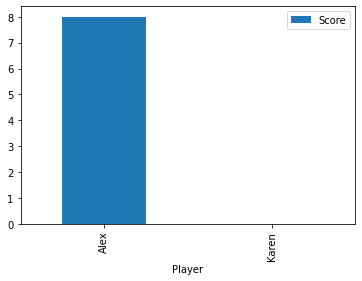

In [6]:
new_game = Game("Alex", "easy_words.csv", "hard_words.csv")